In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
frameTCP = pd.read_csv('ns_latency.txt')
frameUDP = pd.read_csv('ns_latency_udp.txt')

In [40]:
frameTCP['mobile_processing'] = frameTCP['mobile_processing'].div(1000)
frameTCP['server_processing'] = frameTCP['server_processing'].div(1000)
frameTCP['transmission'] = frameTCP['transmission'].div(1000)
frameTCP['end_to_end'] = frameTCP['end_to_end'].div(1000)

frameUDP['mobile_processing'] = frameUDP['mobile_processing'].div(1000)
frameUDP['server_processing'] = frameUDP['server_processing'].div(1000)
frameUDP['transmission'] = frameUDP['transmission'].div(1000)
frameUDP['end_to_end'] = frameUDP['end_to_end'].div(1000)

In [41]:
udp_final_data = frameUDP.filter(["layer_name","mobile_processing", "transmission", "server_processing","end_to_end"]).set_index(["layer_name"])
tcp_final_data = frameTCP.filter(["layer_name","mobile_processing", "transmission", "server_processing","end_to_end"]).set_index(["layer_name"])

In [42]:
ind = np.arange(len(tcp_final_data.index))

tcp_mobile = np.array(tcp_final_data['mobile_processing'])
tcp_transmission = np.array(tcp_final_data['transmission'])
tcp_server = np.array(tcp_final_data['server_processing'])
tcp_error = np.array(tcp_final_data['end_to_end']) - tcp_mobile - tcp_transmission - tcp_server
tcp_error_percent = tcp_error/np.array(tcp_final_data['end_to_end'])

udp_mobile = np.array(udp_final_data['mobile_processing'])
udp_transmission = np.array(udp_final_data['transmission'])
udp_server = np.array(udp_final_data['server_processing'])
udp_error = np.array(udp_final_data['end_to_end']) - udp_mobile - udp_transmission - udp_server
udp_error_percent = udp_error/np.array(udp_final_data['end_to_end'])


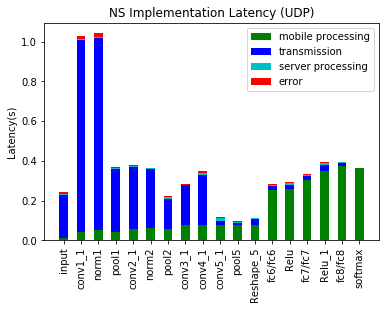

In [45]:
fig1, ax = plt.subplots()

width = 0.5


udp1 = ax.bar(ind, udp_mobile, width=width, color = 'g', label="mobile processing")
udp2 = ax.bar(ind, udp_transmission, width=width, bottom=udp_mobile, color = 'b', label="transmission");
udp3 = ax.bar(ind, udp_server, width=width, bottom=udp_mobile+udp_transmission, color = 'c',label="server processing");
udp4 = ax.bar(ind, udp_error, width=width, bottom=udp_mobile+udp_transmission+udp_server, color = 'r',label="error");


ax.set_ylabel('Latency(s)');
ax.set_xticks(ind);
ax.set_xticklabels(udp_final_data.index, rotation=90, ha="center");
  
# ax0.legend()
ax.autoscale(tight=False);

ax.set_title("NS Implementation Latency (UDP)");

a = ax.legend(loc='best');

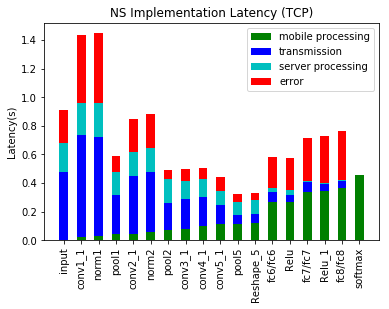

In [46]:
fig2, ax = plt.subplots()

tcp1 = ax.bar(ind, tcp_mobile, width=width, color = 'g', label="mobile processing")
tcp2 = ax.bar(ind, tcp_transmission, width=width, bottom=tcp_mobile, color = 'b', label="transmission")
tcp3 = ax.bar(ind, tcp_server, width=width, bottom=tcp_mobile+tcp_transmission, color = 'c', label="server processing")
tcp4 = ax.bar(ind, tcp_error, width=width, bottom=tcp_mobile+tcp_transmission+tcp_server, color = 'r', label="error")

# fig.set_ylabel()


ax.set_ylabel('Latency(s)')
ax.set_xticks(ind)
ax.set_xticklabels(udp_final_data.index, rotation=90, ha="center")

    
# ax0.legend()
ax.autoscale(tight=False)

ax.set_title("NS Implementation Latency (TCP)");

ax.legend(loc='best')



In [32]:
fig1.tight_layout()

In [33]:
fig2.tight_layout()

In [34]:
fig1.savefig("udp_latency.png")

In [35]:
fig2.savefig("tcp_latency.png")

In [48]:
tcp_error_percent.mean()

0.26077073926317046

In [49]:
udp_error_percent.mean()

0.020544229408515594